In [ ]:
pip install cryptography

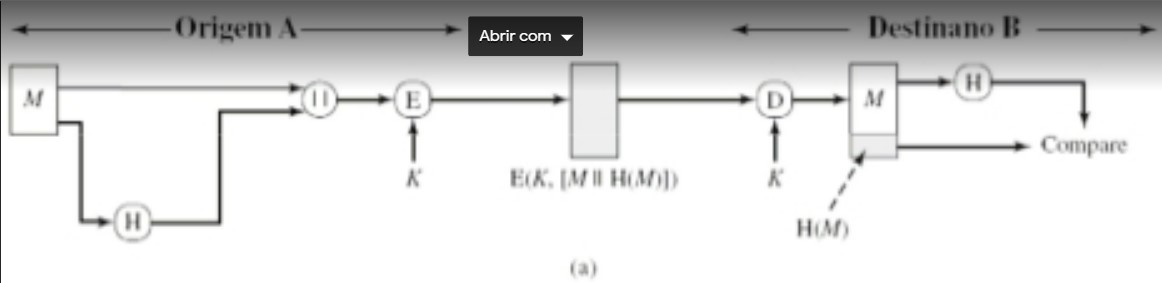

In [83]:
import hashlib
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.primitives import padding


mensagem = b'seguranca computacional'

hash = hashlib.sha256(mensagem).hexdigest()

chave = b'autentic'

cipher = Cipher(algorithms.TripleDES(chave), modes.ECB())

padder = padding.PKCS7(algorithms.TripleDES.block_size).padder()

mensagem_padded = padder.update(mensagem) + padder.finalize()

encryptor = cipher.encryptor()
mensagem_criptografada = encryptor.update(mensagem_padded) + encryptor.finalize()

decryptor = cipher.decryptor()
mensagem_descriptografada_padded = decryptor.update(mensagem_criptografada) + decryptor.finalize()

unpadder = padding.PKCS7(algorithms.TripleDES.block_size).unpadder()
mensagem_descriptografada = unpadder.update(mensagem_descriptografada_padded) + unpadder.finalize()

hash_descriptografado = hashlib.sha256(mensagem_descriptografada).hexdigest()


if hash == hash_descriptografado:
    print("As mensagens são iguais!")
    print(mensagem)
    print(mensagem_descriptografada)
else:
    print("As mensagens são diferentes.")
    print(mensagem)
    print(mensagem_descriptografada)

As mensagens são iguais!
b'seguranca computacional'
b'seguranca computacional'


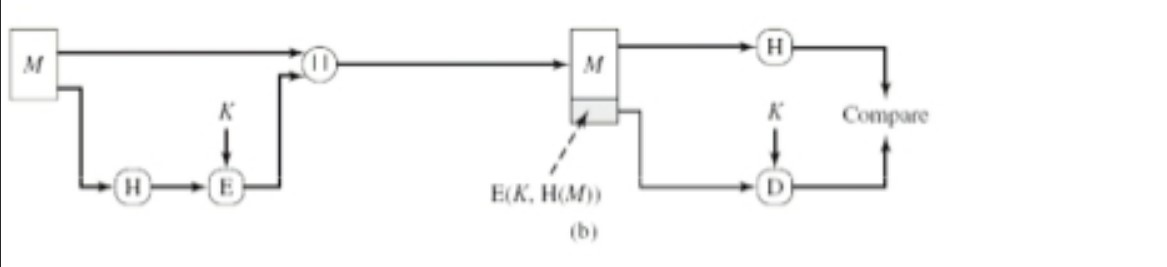

In [84]:
import os
import hashlib
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.primitives import padding


mensagem = b"criptografia hash"

hash_mensagem = hashlib.sha256(mensagem).digest()


chave_3DES = b'autentic'  #chave aleatória de 24 bytes


cipher = Cipher(algorithms.TripleDES(chave_3DES), modes.ECB())

padder = padding.PKCS7(algorithms.TripleDES.block_size).padder()

mensagem_padded = padder.update(hash_mensagem) + padder.finalize()


encryptor = cipher.encryptor()
hash_criptografado = encryptor.update(mensagem_padded) + encryptor.finalize()


decryptor = cipher.decryptor()
hash_descriptografado_padded = decryptor.update(hash_criptografado) + decryptor.finalize()


unpadder = padding.PKCS7(algorithms.TripleDES.block_size).unpadder()
hash_descriptografado = unpadder.update(hash_descriptografado_padded) + unpadder.finalize()


if hashlib.sha256(mensagem).digest() == hash_descriptografado:
    print("As mensagens são iguais!")


else:
    print("As mensagens são diferentes.")

As mensagens são iguais!


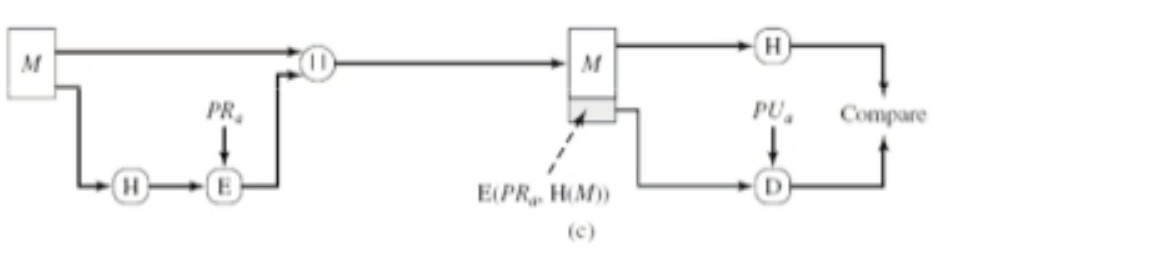

In [85]:
import hashlib
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.asymmetric import rsa, padding


mensagem = b"atividade pratica"


private_key = rsa.generate_private_key(
    public_exponent=65537,
    key_size=2048
)
public_key = private_key.public_key()


hash_mensagem = hashlib.sha256(mensagem).digest()


hash_criptografado = private_key.sign(
    hash_mensagem,
    padding.PSS(
        mgf=padding.MGF1(hashes.SHA256()),
        salt_length=padding.PSS.MAX_LENGTH
    ),
    hashes.SHA256()
)


try:
    public_key.verify(
        hash_criptografado,
        hash_mensagem,
        padding.PSS(
            mgf=padding.MGF1(hashes.SHA256()),
            salt_length=padding.PSS.MAX_LENGTH
        ),
        hashes.SHA256()
    )
    print("Mensagem autêntica!")
except:
    print("Mensagem adulterada!")

Mensagem autêntica!


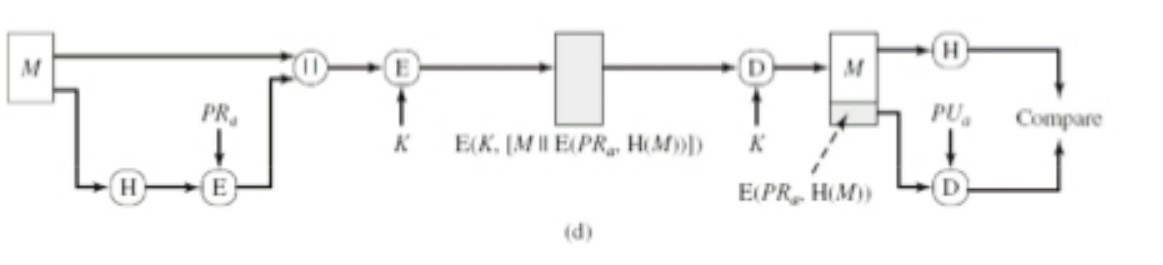

In [86]:
import hashlib
import os
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.asymmetric import rsa, padding
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.primitives import serialization


mensagem = b"atividade pratica"


hash_mensagem = hashlib.sha256(mensagem).digest()


chave_privada = rsa.generate_private_key(public_exponent=65537, key_size=2048) #chaves RSA de 2048 bits
chave_publica = chave_privada.public_key()


hash_encriptado = chave_privada.sign(hash_mensagem, padding.PSS(mgf=padding.MGF1(hashes.SHA256()), salt_length=padding.PSS.MAX_LENGTH), hashes.SHA256())


chave_3DES = os.urandom(24)
cipher = Cipher(algorithms.TripleDES(chave_3DES), modes.ECB())
encryptor = cipher.encryptor()
hash_encriptado_3DES = encryptor.update(hash_encriptado) + encryptor.finalize()

decryptor = cipher.decryptor()
hash_descriptografado = decryptor.update(hash_encriptado_3DES) + decryptor.finalize()


hash_verificado = chave_publica.verify(hash_encriptado, hash_mensagem, padding.PSS(mgf=padding.MGF1(hashes.SHA256()), salt_length=padding.PSS.MAX_LENGTH), hashes.SHA256())


if hash_mensagem == hash_verificado:
    print("As mensagens são iguais!")
else:
    print("As mensagens são diferentes.")


As mensagens são diferentes.


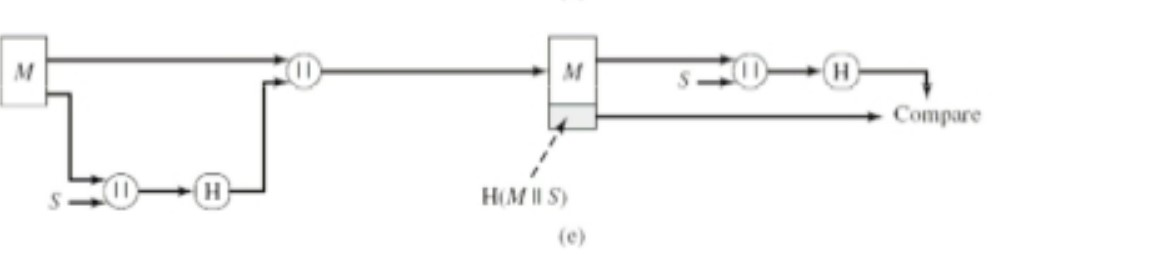

In [ ]:
import hashlib
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.primitives import padding
import secrets

chave_compartilhada = b'autentic'

mensagem = b"atividade pratica"

hash_mensagem = hashlib.sha256(mensagem).digest()

padder = padding.PKCS7(algorithms.TripleDES.block_size).padder()
hash_padded = padder.update(hash_mensagem) + padder.finalize()


decryptor = cipher.decryptor()
hash_desencriptado_padded = decryptor.update(hash_encriptado) + decryptor.finalize()

unpadder = padding.PKCS7(algorithms.TripleDES.block_size).unpadder()
hash_desencriptado = unpadder.update(hash_desencriptado_padded) + unpadder.finalize()

if hash_mensagem == hash_desencriptado:
    print("Os hashes são iguais!")
else:
    print("Os hashes são diferentes!")

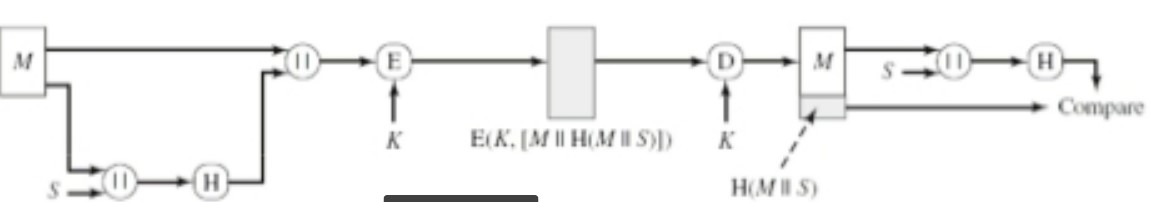

In [87]:
import hashlib
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.primitives import padding
import secrets

chave_compartilhada = b'autentic'

mensagem = b"atividade pratica"


hash_mensagem = hashlib.sha256(mensagem).digest()

padder = padding.PKCS7(algorithms.TripleDES.block_size).padder()
hash_padded = padder.update(hash_mensagem) + padder.finalize()

cipher = Cipher(algorithms.TripleDES(chave_compartilhada), modes.ECB())

encryptor = cipher.encryptor()
hash_encriptado = encryptor.update(hash_padded) + encryptor.finalize()

decryptor = cipher.decryptor()
hash_desencriptado_padded = decryptor.update(hash_encriptado) + decryptor.finalize()


unpadder = padding.PKCS7(algorithms.TripleDES.block_size).unpadder()
hash_desencriptado = unpadder.update(hash_desencriptado_padded) + unpadder.finalize()


if hash_mensagem == hash_desencriptado:
    print("Os hashes são iguais!")
else:
    print("Os hashes são diferentes!")

Os hashes são iguais!
